In [1]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

In [2]:
import scanpy as sc 
import sys 
import umap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tqdm import tqdm
import glob
import warnings
warnings.filterwarnings('ignore')
sys.path.append('../../src')

In [3]:
from spaceoracle.prophets import Prophet
from spaceoracle.plotting.cartography import xy_from_adata
from spaceoracle.plotting.cartography import Cartography

In [4]:
# adata = sc.read_h5ad('/ix1/ylee/kor11/djishnu_kor11/training_data_2025/snrna_human_tonsil.h5ad')
adata = sc.read_h5ad('/Users/koush/Desktop/training_data/snrna_human_tonsil.h5ad')

In [112]:
# Human Tonsil snRNAseq from SlideTags
# https://www.nature.com/articles/s41586-023-06837-4

import re
adata = sc.read_h5ad('/Users/koush/Downloads/slidetags_human_tonsil/human_tonsil.h5ad')
adata = adata[:, [gene for gene in adata.var_names if not bool(re.search(r'\.\d+$', gene))]]
adata = adata[sc.read_h5ad('/Users/koush/Desktop/training_data/snrna_human_tonsil.h5ad').obs_names]
del adata.uns

In [113]:
adata.obsm['X_umap'] = pd.read_csv('../../notebooks/human_tonsil/umap.csv', index_col=0).values
adata.obs = adata.obs.join(pd.read_csv('../../notebooks/human_tonsil/tonsil_cell_types.csv', index_col=0))

In [104]:
markers = {
    'GC B cells': ['BCL6', 'AICDA'],
    'DZ': ['STMN1', 'BIRC5', 'TOP2A', 'AURKB', 'CXCR4', 'TACC3', 'CKS1B', 'CDK1', 'MKI67', 'UBE2C', 'CCNA2', 'KIAA0101', 'CDCA3', 'KIF22', 'HMGB3', 'CDKN3', 'NUSAP1', 'AICDA', 'MYBL2', 'LMNB1'],
    'DZ/LZ': ['GPX1', 'CD27.LY86', 'HMCES', 'JCHAIN', 'HSPA4', 'DNAJC10', 'FCRLA', 'INPP5D', 'QRSL1', 'REEP5', 'LILRB1', 'CD24', 'WDR83OS', 'ALOX5', 'ARHGEF2', 'SERINC2', 'RPS19BP1', 'PYCARD', 'C2orf88LZ', 'BCL2A1', 'CD83', 'IL4I1', 'LMO3', 'EBI3', 'HLA-DQB2', 'TRAF4', 'PLEK', 'IER2', 'NFKBIA', 'FCER2', 'BCAR3', 'DUSPSNX11', 'PLPP5', 'PHACTR1', 'TAP1', 'RAB3GAP2', 'DHRS9', 'FCRL5'],
    'LZ': ['BCL2A', 'CD83', 'IL-4I1', 'LMO2', 'EBI3', 'HLA-DQB2', 'TRAF4', 'PLEK', 'IER2', 'NFKBIA', 'FCRE2', 'BCAR3', 'DUSP2', 'SNX11', 'PLPP5', 'PHACTR1', 'TAP1', 'RAB3GAP2', 'DHRS9', 'FCRL5']
}

View of AnnData object with n_obs × n_vars = 5778 × 19171
    obs: 'cell_type'
    obsm: 'spatial'

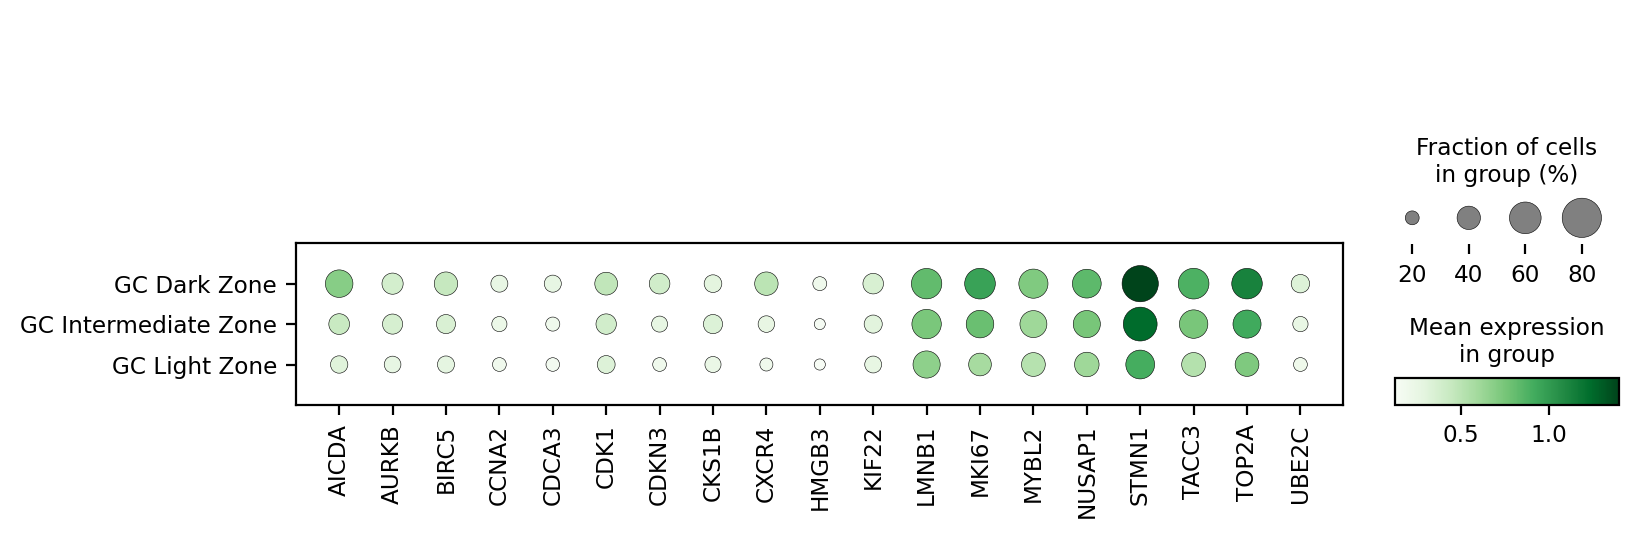

In [120]:
sc.pl.dotplot(adata[adata.obs.cell_type_2.str.contains('GC')], 
    var_names=np.intersect1d(adata.var_names, markers['DZ']), 
    groupby='cell_type_2', cmap='Greens', show=True)


In [5]:
# xy = xy_from_adata(adata)
# sc.pp.pca(adata, n_comps=50)
# sc.pp.neighbors(adata, use_rep='X_pca')
# sc.tl.umap(adata)

In [6]:
# adata_subset = adata[adata.obs.cell_type.isin(['T_CD4'])]
# sc.pp.neighbors(adata_subset, use_rep='X_pca')

# sc.tl.leiden(adata_subset, resolution=0.9)
# adata.obs = adata.obs.join(adata_subset.obs.leiden)

# adata.obs.leiden = adata.obs.leiden.replace({
#     '0': 'Naive CD4 T',
#     '1': 'Treg',
#     '2': 'T memory',
#     '3': 'T memory',
#     '4': 'Th1',
#     '5': 'Th2',
#     '6': 'Treg',
# })

# adata.obs.leiden = adata.obs.leiden.astype(str)
# adata.obs.leiden = adata.obs.leiden.replace('nan', np.nan)
# adata.obs = adata.obs.astype(str)

# adata

In [7]:
# adata.obs['cell_type_2'] = adata.obs['leiden'].copy()
# mask_gc = adata.obs['author_cell_type'] == 'B_germinal_center'
# adata.obs.loc[mask_gc, 'cell_type_2'] = adata.obs.loc[mask_gc, 'banksy_celltypes']
# mask_na = adata.obs['cell_type_2'].isin(['nan', 'NA', 'na']) | adata.obs['cell_type_2'].isna()
# adata.obs.loc[mask_na, 'cell_type_2'] = adata.obs.loc[mask_na, 'author_cell_type']

# adata.obs['cell_type_2'] = adata.obs['cell_type_2'].replace({
#     'T_CD4': 'FDC',
# })
# mask = (adata.obs['author_cell_type'] == 'B_germinal_center') & (adata.obs['banksy_celltypes'] == 'T_follicular_helper')
# adata.obs.loc[mask, 'cell_type_2'] = 'B_germinal_center'

# mask = (adata.obs['cell_type_2'] == 'B_germinal_center') & (adata.obs['banksy_celltypes'] == 'T_follicular_helper')
# adata.obs.loc[mask, 'cell_type_2'] = 'T_follicular_helper'

In [8]:
# adata.obs.iloc[[ 444, 1834, 3626, 3647], 
#                adata.obs.columns.get_loc('cell_type_2')] = 'B_memory'
# adata.obs.iloc[[ 375,  582,  703, 1808, 2609, 4208, 4819], 
#                adata.obs.columns.get_loc('cell_type_2')] = 'T_follicular_helper'
# adata.obs.iloc[[ 1998, 167,  454,  598, 1902, 2003, 2150, 2730, 2820, 3359, 5172, 5231, 5423, 5487, 5603], 
#                adata.obs.columns.get_loc('cell_type_2')] = 'GC Intermediate Zone'
# adata.obs.iloc[[  48,  501,  721,  779,  892, 1275, 1404, 2274, 2881, 3196, 3585, 
#                 4200, 4567, 4823, 4825, 5196, 5441, 5595], 
#                adata.obs.columns.get_loc('cell_type_2')] = 'GC Light Zone'


In [9]:
# adata.obs['cell_type_2'] = adata.obs['cell_type_2'].astype('category')
# adata.obs['cell_type'] = adata.obs['cell_type'].astype('category')

In [10]:
# adata.obs['cell_type_2'].astype('str').to_csv('tonsil_cell_types.csv')

In [11]:
from spaceoracle.oracles import BaseTravLR

In [12]:
adata.obs = adata.obs.join(pd.read_csv('tonsil_cell_types.csv', index_col=0))

In [13]:
BaseTravLR.impute_clusterwise(
    adata, 
    annot='cell_type_2', 
    layer='normalized_count', 
    layer_added='imputed_count'
)   

In [14]:
color_dict = {
    'T_CD4': "#f721b7",
    'GC Dark Zone': "#2517e8",
    'GC Light Zone': "#e7692a",
    'GC Intermediate Zone':  "#7dbcfb",
    'plasma': "#61c17c",
    'B_naive': "#308f0e", 
    'B_memory': "#beb637",
    
    'Naive CD4 T': "#f721b7",
    'Treg': "#ecc91d",
    'T memory': "#49f12f",
    'Th1': "#c43cf2",
    'Th2': "#2c43f1",
    'T_CD8': "#dd3652",
    'T_follicular_helper': "#e28723",
}

In [15]:
adata.obsm['X_umap'] = pd.read_csv('umap.csv', index_col=0).values

In [16]:
chart = Cartography(adata[
    adata.obs.cell_type_2.isin(['T_follicular_helper', 'Th2', 'Th1', 'Treg', 'Naive CD4 T'])], 
color_dict)

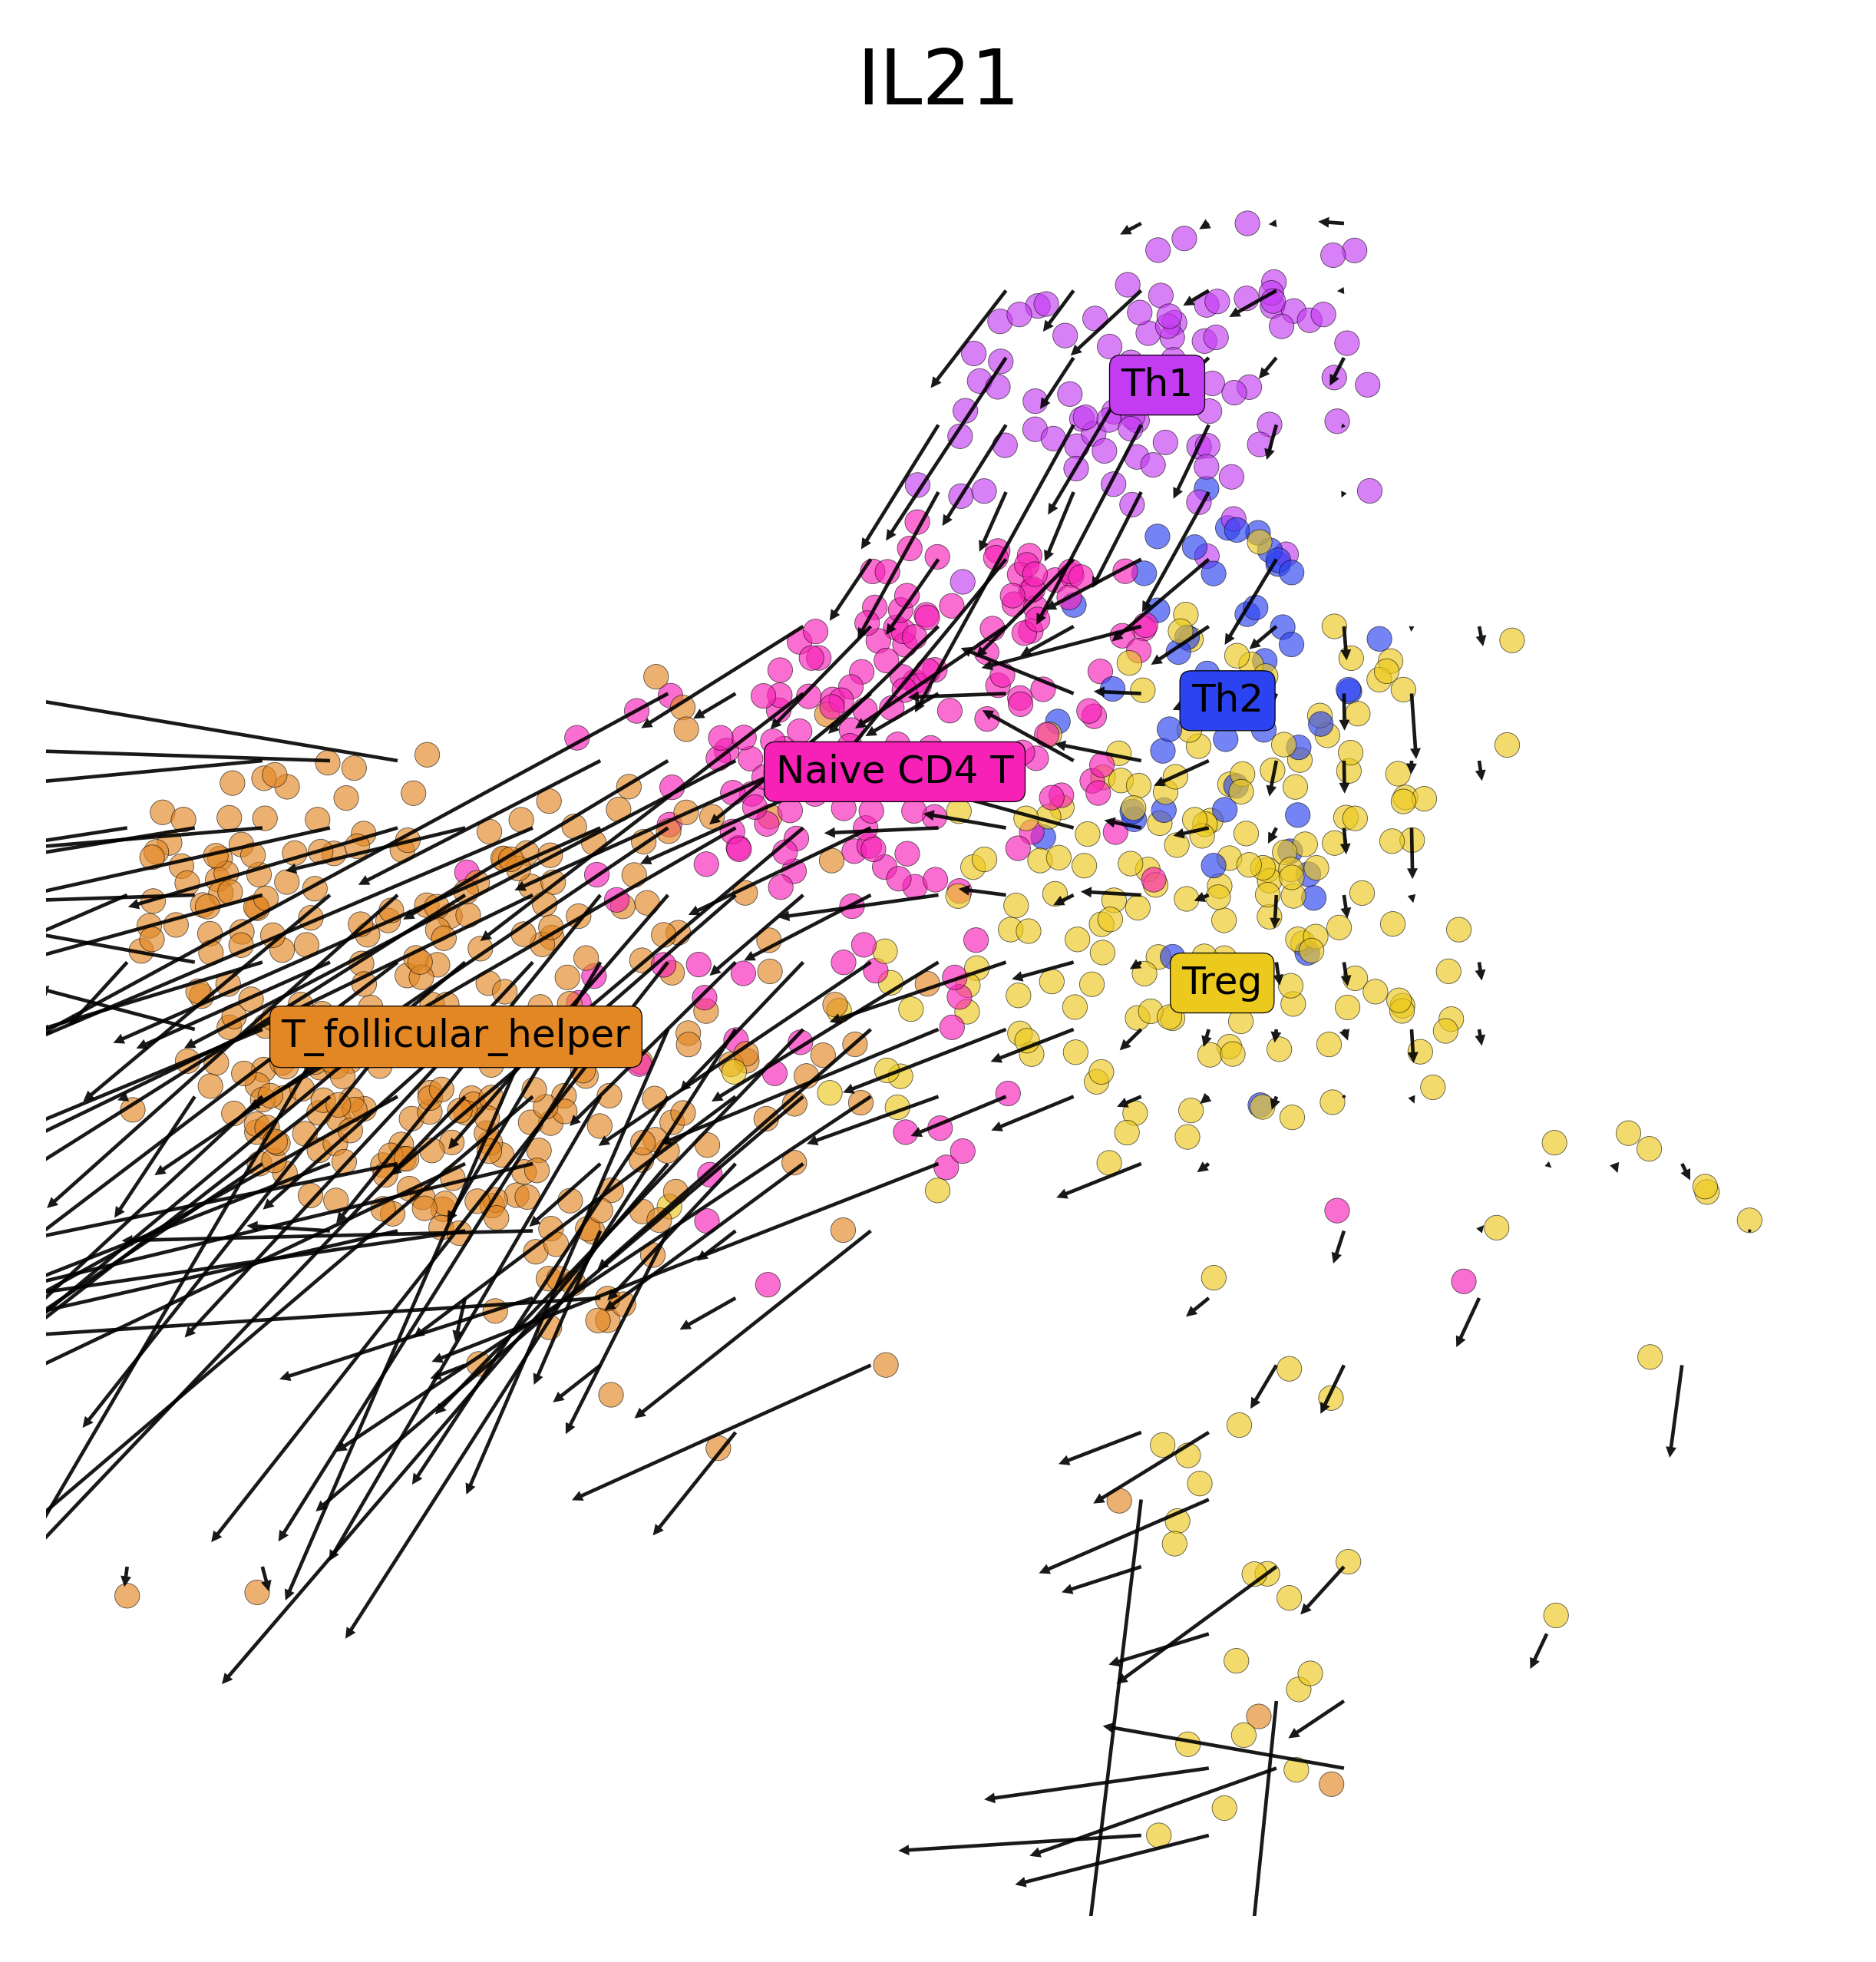

In [17]:
perturb_target = 'IL21'

perturbed_df = pd.read_parquet(
    f'/Volumes/SSD/genome_screens/human_tonsil/{perturb_target}_4n_maxx.parquet')

# perturbed_df.loc[~adata.obs.cell_type_2.isin(['Th2']), :] = adata.to_df(
#     layer='imputed_count').loc[~adata.obs.cell_type_2.isin(['Th2']), :]

grid_points, vector_field, P = chart.plot_umap_quiver(
    perturb_target=perturb_target,
    grid_scale=1,
    vector_scale=0.3,
    n_neighbors=100,
    figsize=(5, 5), 
    hue='cell_type_2',
    alpha=0.65,
    perturbed_df=perturbed_df,
    scatter_size=15,
    remove_null=True,
    legend_on_loc=True,
    legend_fontsize=6,
)

# plt.title('IL4 KO in Th2 cells')
plt.show()

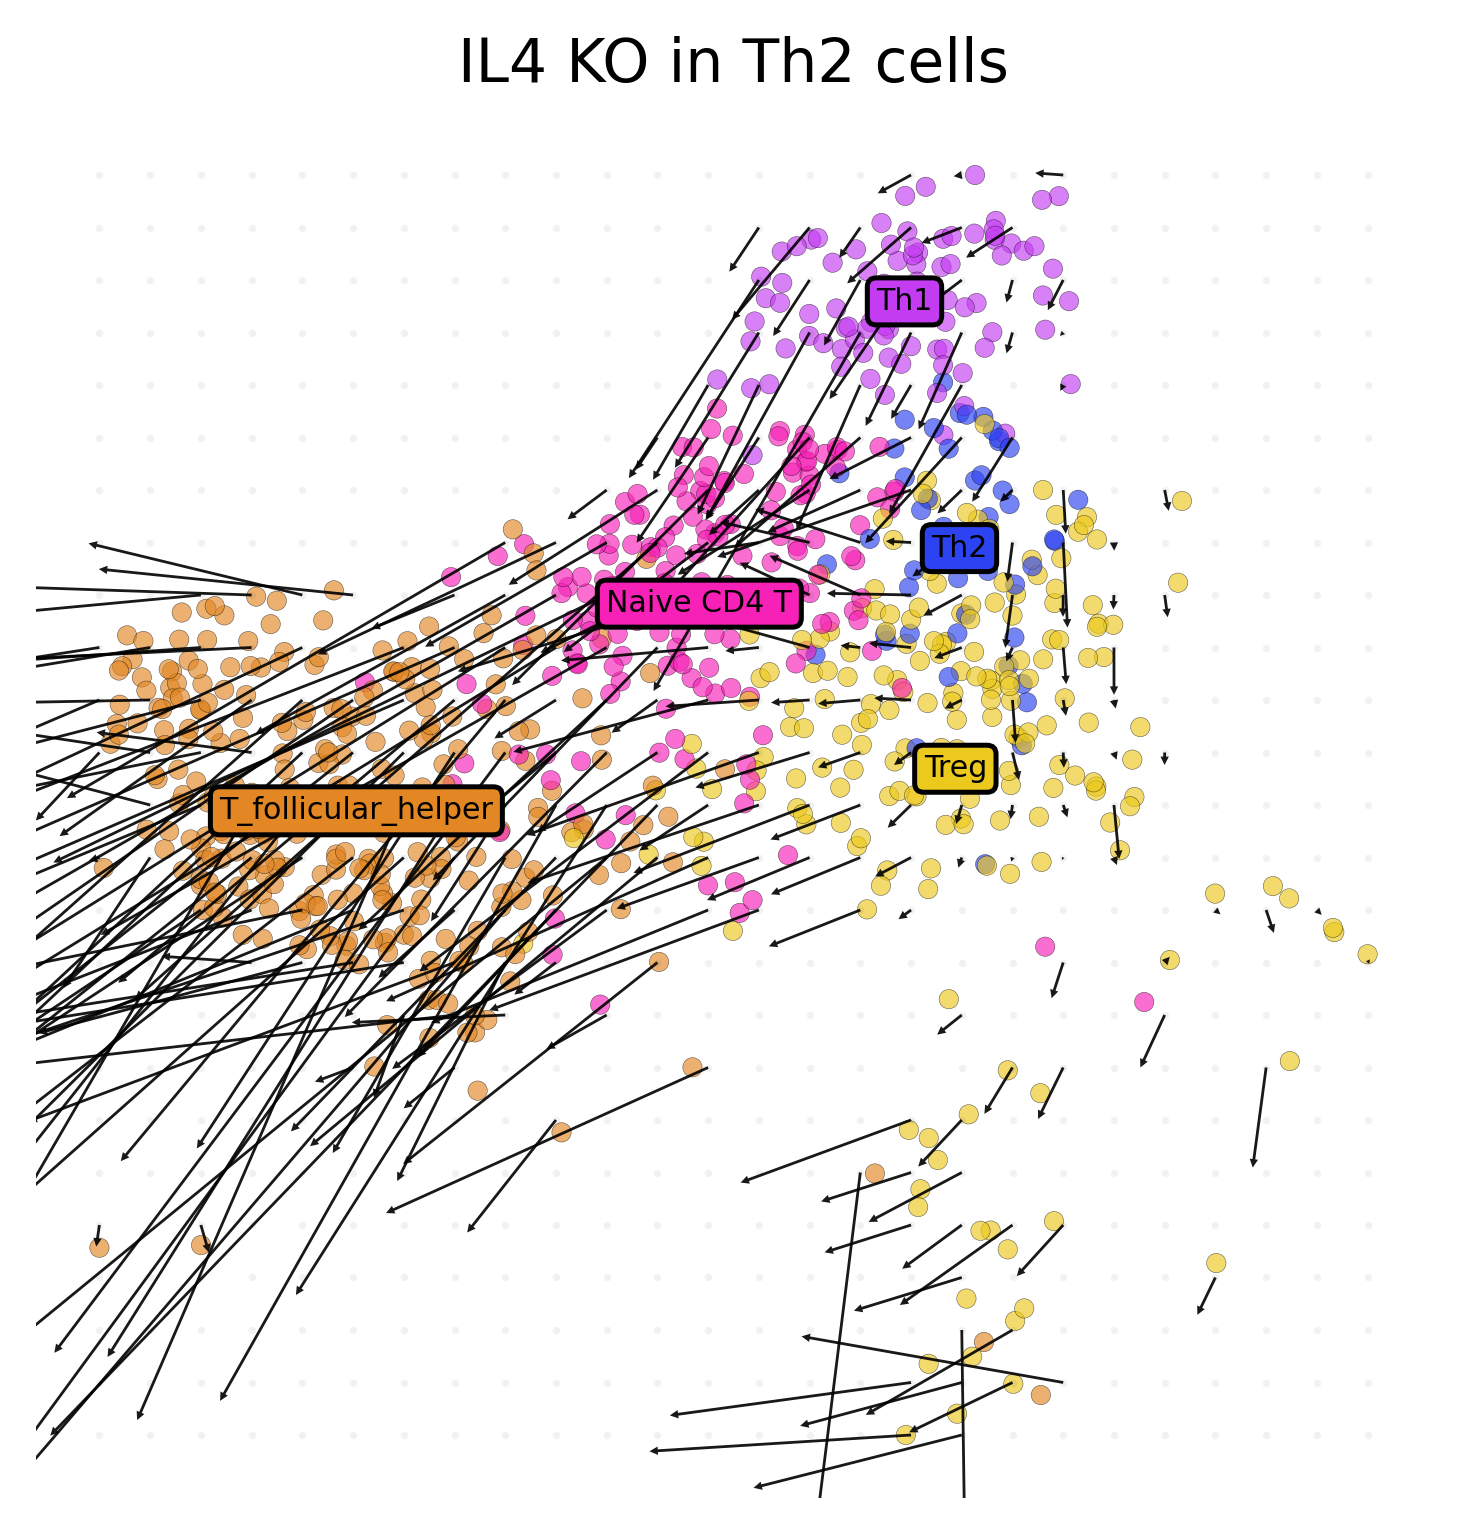

In [99]:
perturb_target = 'IL21'

perturbed_df = pd.read_parquet(
    f'/Volumes/SSD/genome_screens/human_tonsil/{perturb_target}_4n_maxx.parquet')

# perturbed_df.loc[~adata.obs.cell_type_2.isin(['Th2']), :] = adata.to_df(
#     layer='imputed_count').loc[~adata.obs.cell_type_2.isin(['Th2']), :]

grid_points, vector_field, P = chart.plot_umap_quiver(
    perturb_target=perturb_target,
    grid_scale=1,
    vector_scale=0.3,
    n_neighbors=100,
    figsize=(5, 5), 
    hue='cell_type_2',
    alpha=0.65,
    perturbed_df=perturbed_df,
    scatter_size=15,
    remove_null=True,
    legend_on_loc=True,
    legend_fontsize=6,
)

plt.title('IL4 KO in Th2 cells')
plt.show()

In [96]:
chart.adata.obs['cell_type_2'].value_counts()

cell_type_2
T_follicular_helper    300
Treg                   198
Naive CD4 T            177
Th1                     88
Th2                     47
Name: count, dtype: int64

In [105]:
from sklearn.neighbors import KDTree

def get_vector_field_strength(xy_coords, grid_points, vector_field):
    grid_magnitudes = np.linalg.norm(vector_field, axis=1)
    grid_angles = np.arctan2(vector_field[:, 1], vector_field[:, 0])
    tree = KDTree(grid_points)
    _, indices = tree.query(xy_coords)
    strengths = grid_magnitudes[indices]
    angles = grid_angles[indices]
    
    return strengths, angles


def plot_quiver(grid_points, vector_field, r=0.1, base=0.01, quiver=True):

    fig, ax = plt.subplots(figsize=(8, 6), dpi=300)

    magnitudes = np.linalg.norm(vector_field, axis=1)
    indices = magnitudes > 0
    grid_points = grid_points[indices]
    vector_field = vector_field[indices]
    
    X = chart.adata.obsm['X_umap'][:, :]
    cell_types = chart.adata.obs['cell_type']
    

    magg, angles = get_vector_field_strength(adata.obsm['X_umap'], grid_points, vector_field)
    min_mag = np.min(magg)
    max_mag = np.max(magg)
    
    for i in range(len(X)):
        x, y = X[i]
        fig = plt.gcf()
        ax = plt.gca()
        
        mag = magg[i]
        angle = angles[i]
        cell_type = cell_types[i]
        mag_norm = base + (mag - min_mag) * (5 - base) / (max_mag - min_mag)
        
        gradient = np.random.beta(1, mag_norm, size=(256, 1))
        gradient.sort(axis=0)
        
        color_to = 'red'
        color_from = 'green'
        
        
        # if cell_type == 'GC Dark Zone':
        #     color_from = color_dict['GC Dark Zone']
        #     color_to = color_dict['GC Light Zone']
        # elif cell_type == 'GC Light Zone':
        #     color_from  = "#73065d"
        #     color_to = "#f309c5"

        # elif cell_type == 'GC Intermediate Zone':
        #     color_from = color_dict['GC Intermediate Zone']
        #     color_to = color_dict['GC Light Zone']
            
        img = ax.imshow(gradient,
                        cmap=LinearSegmentedColormap.from_list('custom', [
                            color_to, color_from]),
                        extent=[x-r, x+r, y-r, y+r],
                        transform=Affine2D().rotate_around(x, y, angle + np.pi/2) + ax.transData
                        )
        
        circle = plt.Circle((x, y), r, transform=ax.transData)
        img.set_clip_path(circle)
        
        # Add a line to show the mean of the gradient
        mean_position = np.mean(np.where(gradient > 0.5)[0]) / 256
        line_length = r * 2
        line_x_start = x - r + mean_position * line_length
        line_y = y
        
        # Create a line perpendicular to the gradient direction
        line = plt.Line2D(
            [line_x_start, line_x_start], 
            [y-r, y+r],
            transform=Affine2D().rotate_around(x, y, angle + np.pi/2) + ax.transData,
            color='black',
            linewidth=0.5,
            alpha=0.7
        )
        ax.add_artist(line)

    ax.quiver(
        grid_points[:, 0], grid_points[:, 1],   
        vector_field[:, 0], vector_field[:, 1], 
        angles='xy', scale_units='xy', scale=1, 
        headwidth=3, headlength=3, headaxislength=3,
        width=0.002, alpha=0.9 if quiver else 0
    )

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_axis_off()

    if ax is not None:
        return ax

In [109]:
# plot_quiver(grid_points, vector_field, r=0.08, quiver=False)
# plt.title('IL21 OverExpression')
# plt.show()

In [25]:
ligands = ['IL7', 'IL4',  'IL6ST', 'GZMA']
receptors = ['CXCR4', 'CXCL12', 'CCR2', 'IL7R']
tf = ['GATA3', 'PAX5', 'FOXP3', 'BCL6', 'TBX21', 'PRDM1']

In [26]:
for i in ligands+receptors+tf:
    if i not in adata.var_names:
        print(i)

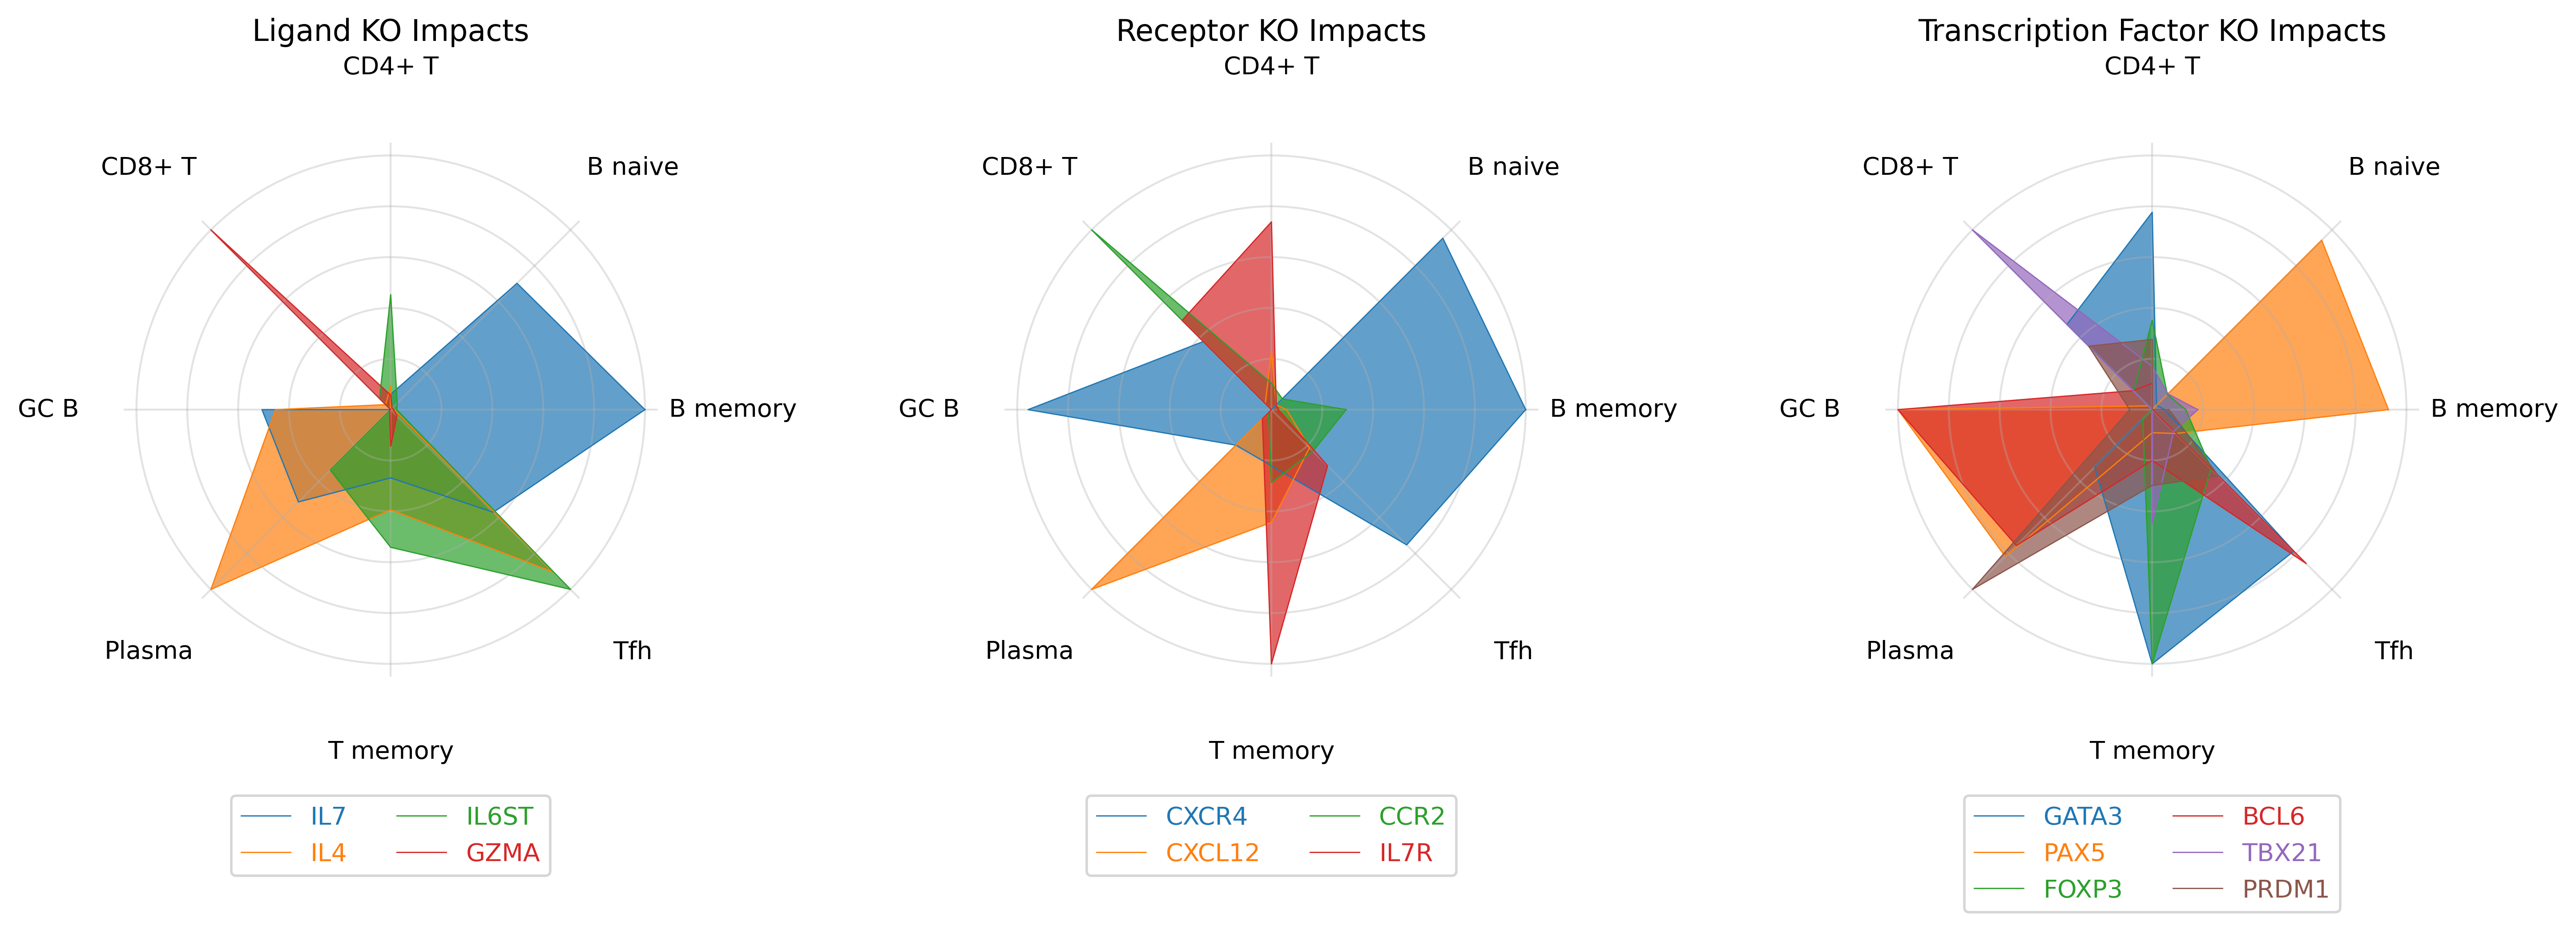

In [27]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5), dpi=200, subplot_kw={'projection': 'polar'})

# Helper function to plot radar chart
def plot_radar(kotargets, ax, title):
    for kotarget in kotargets:
        data = (pd.read_parquet(
            f'/Volumes/SSD/genome_screens/human_tonsil/{kotarget}_4n_0x.parquet').loc[
                chart.adata.obs_names
            ]-chart.adata.to_df(layer='imputed_count')
            ).join(chart.adata.obs.cell_type_2).groupby(
                'cell_type_2'
            ).mean().abs().mean(axis=1)
        
        # Normalize values between 0 and 1
        data = (data - data.min()) / (data.max() - data.min())

        # Prepare data for radar plot
        categories = data.index.tolist()
        values = data.values.tolist()
        values += values[:1] # Repeat first value to close the polygon
        angles = np.linspace(0, 2*np.pi, len(categories), endpoint=False)
        angles = np.concatenate((angles, [angles[0]])) # Repeat first angle to close the polygon

        # Plot data
        ax.plot(angles, values, '-', linewidth=0.5, label=kotarget)
        ax.fill(angles, values, alpha=0.7)
    
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, size=10)
    ax.tick_params(pad=20)
    ax.set_yticklabels([])
    ax.grid(True, alpha=0.35)
    ax.spines['polar'].set_visible(False)
    ax.set_title(title)
    legend = ax.legend(bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=2, markerscale=1)
    for text, line in zip(legend.get_texts(), legend.get_lines()):
        text.set_color(line.get_color())

plot_radar(ligands, axs[0], 'Ligand KO Impacts')
plot_radar(receptors, axs[1], 'Receptor KO Impacts')
plot_radar(tf, axs[2], 'Transcription Factor KO Impacts')

plt.tight_layout()
plt.show()

In [4]:
# ko_screen = []
# for kodf in tqdm(list(glob.glob('/Volumes/SSD/genome_screens/human_tonsil/*.parquet'))):
#     data = (pd.read_parquet(kodf).loc[
#             chart.adata.obs_names
#         ]-chart.adata.to_df(layer='imputed_count')
#         ).join(chart.adata.obs.cell_type_2).groupby(
#             'cell_type_2'
#         ).mean().abs().mean(axis=1).sort_values(
#             ascending=True
#         )
        
#     data = data.to_frame()
#     data.columns = [kodf.split('/')[-1].split('_')[0]]
    
#     ko_screen.append(data)

In [2]:
# import matplotlib.pyplot as plt
# import random

# unique_cell_types = adata.obs.cell_type_2.unique()
# fig, axs = plt.subplots(2, 4, figsize=(20, 10), dpi=200)
# for i, cell_type in enumerate(unique_cell_types):
#     row, col = divmod(i, 4)
#     colors = [random.choice(['#%06X' % random.randint(0, 0xFFFFFF) for _ in range(6)]) for _ in range(20)]
#     axs[row, col].barh(pd.concat(ko_screen, axis=1).loc[cell_type].sort_values(ascending=False).head(20).index, 
#                        pd.concat(ko_screen, axis=1).loc[cell_type].sort_values(ascending=False).head(20).values, 
#                        color=colors, linewidth=1, edgecolor='black')
#     axs[row, col].set_title(cell_type)
#     axs[row, col].invert_yaxis()
#     axs[row, col].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
# plt.tight_layout()
# plt.show()

In [3]:
# kotarget = 'GATA3'
# data = (pd.read_parquet(
#     f'/Volumes/SSD/genome_screens/human_tonsil/{kotarget}_4n_0x.parquet').loc[
#         chart.adata.obs_names
#     ]-chart.adata.to_df(layer='imputed_count')
#     ).join(chart.adata.obs.cell_type_2).groupby(
#         'cell_type_2'
#     ).mean().abs().mean(axis=1).sort_values(
#         ascending=True
#     )

# plt.figure(figsize=(6, 4), dpi=100)
# sns.barplot(
#     x=data.values,
#     y=data.index,
#     edgecolor='black',
#     palette=color_dict,
#     linewidth=2,
#     order=data.index[::-1],
# )

# plt.xlabel('Mean Expression')
# plt.ylabel('Cell Type')
# plt.title(f'{kotarget} KO Impact by Cell Type')

# sns.despine(offset=5)
# plt.gca().spines['bottom'].set_visible(False)
# plt.gca().spines['left'].set_visible(False)
# plt.gca().spines['right'].set_visible(False)
# plt.tight_layout()
# plt.show()

In [20]:
adata = sc.read_h5ad('/Users/koush/Desktop/training_data/snrna_human_tonsil.h5ad')
adata.obsm['X_umap'] = pd.read_csv('../../notebooks/human_tonsil/umap.csv', index_col=0).values
adata.obs = adata.obs.join(pd.read_csv('../../notebooks/human_tonsil/tonsil_cell_types.csv', index_col=0))

sc.pp.pca(adata)
sc.pp.neighbors(adata)

adata.layers['imputed_count'] = np.load('../../notebooks/human_tonsil/imputed_counts.npy')

In [21]:
color_dict = {
    'GC Dark Zone': "#f14e13",
    'GC Light Zone': "#0feca9",
    'GC Intermediate Zone':  "#4492e0",
    'plasma': "#61c17c",
    'B_naive': "#308f0e", 
    'B_memory': "#beb637",
    'B_germinal_center': "#8995cf",
    'Naive CD4 T': "#f721b7",
    'Treg': "#ecc91d",
    'T memory': "#49f12f",
    'Th1': "#c43cf2",
    'Th2': "#5e6ff3",
    'T_CD8': "#dd3652",
    'T_CD4': "#2b07f6",
    'T_follicular_helper': "#e28723",
    'mDC': "#a5a29e", 
    'FDC': "#a5a29e", 
    'myeloid': "#a5a29e", 
    'NK': "#a5a29e", 
    'pDC': "#a5a29e", 
    'T_double_neg': "#a5a29e",
    'Germinal Center B cells': "#6295cd",
    'Plasma cells': "#58a862",
    'T cells': "#cc5343",
    'B cells': "#9865c8",
    'Dendritic cells': "#9da13c",
    'Myeloid cells': "#f3c009",
    'NK cells': "#a36e29",
}

In [23]:
chart = Cartography(adata, color_dict)

In [25]:
from spaceoracle.plotting.shift import estimate_transition_probabilities


In [26]:
%%time

kotarget = 'FOXO1'
embedding = adata.obsm['X_umap']
n_neighbors = 100
betadata_path = '/Volumes/SSD/genome_screens/human_tonsil'
perturbed_df = pd.read_parquet(f'{betadata_path}/{kotarget}_4n_0x.parquet')
delta_X = perturbed_df.loc[
    chart.adata.obs_names].values - chart.adata.layers['imputed_count']
chart.adata.layers[kotarget] = perturbed_df.loc[chart.adata.obs_names].values.copy()
corr = chart.get_corr(kotarget)
del chart.adata.layers[kotarget]

CPU times: user 4min 11s, sys: 2min 6s, total: 6min 18s
Wall time: 1min 22s


In [27]:
kotarget = 'FOXO1'
co_perturbed_df = pd.read_csv('celloracle_FOXO1_KO.csv', index_col=0)
delta_X = co_perturbed_df.loc[
    chart.adata.obs_names].values - chart.adata.layers['imputed_count']
chart.adata.layers[kotarget] = co_perturbed_df.loc[chart.adata.obs_names].values.copy()
co_corr = chart.get_corr(kotarget)
del chart.adata.layers[kotarget]

In [45]:
adata.layers['FOXO1_KO_CO'] = co_perturbed_df.values
adata.layers['FOXO1_KO_ST'] = perturbed_df.values

In [68]:
adata.to_df(layer='imputed_count')[['CXCR4']][adata.obs.cell_type_2.str.contains('Intermediate')].mean()

Unnamed: 0
CXCR4    0.305052
dtype: float64

In [69]:
adata.to_df(layer='FOXO1_KO_CO')[['CXCR4']][adata.obs.cell_type_2.str.contains('Intermediate')].mean()

Unnamed: 0
CXCR4    0.301882
dtype: float64

In [70]:
adata.to_df(layer='FOXO1_KO_ST')[['CXCR4']][adata.obs.cell_type_2.str.contains('Intermediate')].mean()

Unnamed: 0
CXCR4    0.183288
dtype: float64

In [85]:
np.intersect1d(adata.var_names, ['GPX1', 'CD27'])

array(['CD27'], dtype=object)

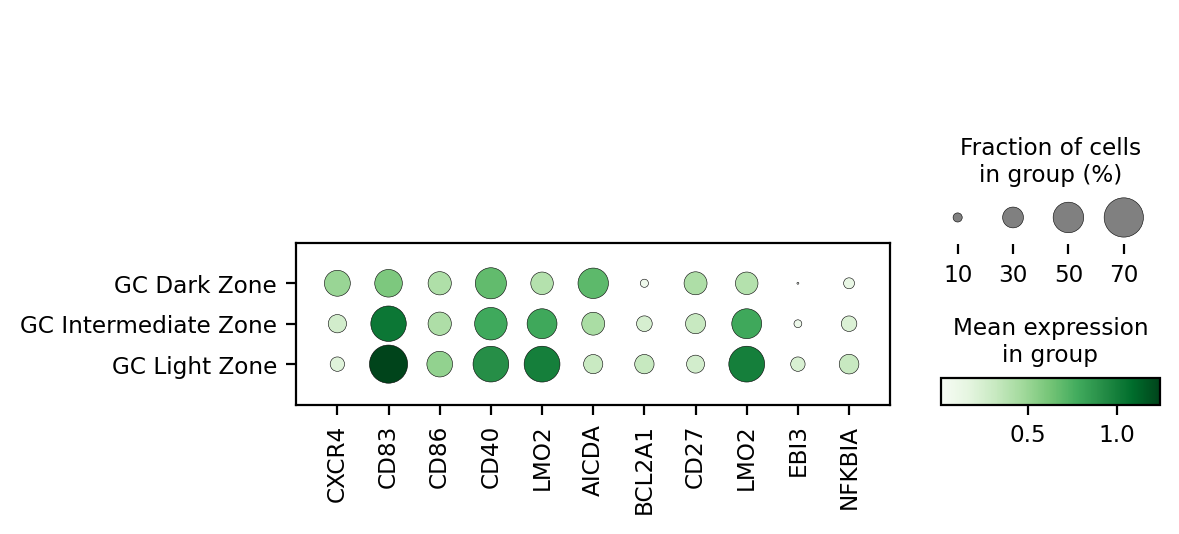

In [99]:
sc.pl.dotplot(adata[adata.obs.cell_type_2.str.contains('GC')], 
    var_names=['CXCR4', 'CD83', 'CD86', 'CD40', 'LMO2', 'AICDA', 
        'BCL2A1', 'CD27', 'LMO2', 'EBI3', 'NFKBIA'], 
    groupby='cell_type_2', layer='normalized_count', cmap='Greens', show=True)

In [28]:
corr_null = chart.compute_perturbation_corr(
    chart.adata.to_df(layer='imputed_count'), delta_X*0)

In [37]:
# source_ct = 'GC Dark Zone'
source_ct = 'GC Intermediate Zone'

n_cells = chart.adata.shape[0]
P = np.ones((n_cells, n_cells))
T = 0.05
np.fill_diagonal(P, 0)
P *= np.exp(co_corr / T)   
P /= P.sum(1)[:, None]

P_null = np.ones((n_cells, n_cells))
np.fill_diagonal(P_null, 0)
P_null *= np.exp(corr_null / T)   
P_null /= P_null.sum(1)[:, None]
P = P - P_null

# P = (P - P.min()) / (P.max() - P.min())
# P = P / P.sum(axis=1)[:, np.newaxis]

transition_df = pd.DataFrame(P[chart.adata.obs['cell_type_2'] == source_ct])
transition_df.columns = chart.adata.obs_names
transition_df.columns.name = source_ct

chart.assess_transitions(
    transition_df, 
    base_celltypes=chart.adata.obs.cell_type_2, 
    source_ct=source_ct,
    annot='cell_type_2'
)

Source Cells: GC Intermediate Zone       min      mean       max
Transition Target                                               
GC Light Zone                      -0.000173  0.000567  0.001187
FDC                                -0.000173 -0.000030  0.001285
plasma                             -0.000173 -0.000049  0.003337
B_naive                            -0.000173 -0.000051  0.000444
GC Intermediate Zone               -0.000173 -0.000052  0.001787
T_follicular_helper                -0.000173 -0.000070  0.002296
GC Dark Zone                       -0.000173 -0.000086  0.001167
pDC                                -0.000173 -0.000088  0.000240
T memory                           -0.000173 -0.000106  0.001017
Treg                               -0.000173 -0.000110  0.001566
B_memory                           -0.000173 -0.000112  0.001017
mDC                                -0.000173 -0.000124  0.000074
Th2                                -0.000173 -0.000124  0.000562
T_CD8                              -0.000173 -0.000127  0.000252
myeloid                            -0.000173 -0.000130  0.000130
Naive CD4 T                        -0.000173 -0.000132  0.000530
NK                                 -0.000173 -0.000132  0.000719
T_double_neg                       -0.000173 -0.000136  0.000172
Th1                                -0.000173 -0.000143  0.000270

In [36]:
thresh = 0.000555
allowed_fates = ['GC Light Zone', 'GC Intermediate Zone', 'GC Dark Zone']
transitions = chart.get_cellfate(transition_df, allowed_fates, thresh, annot='cell_type_2')

Counter({'GC Light Zone': 465, 'GC Intermediate Zone': 2}) 0.0007421733245414517


In [38]:
thresh = 0.000555
allowed_fates = ['GC Light Zone', 'GC Intermediate Zone', 'GC Dark Zone']
transitions = chart.get_cellfate(transition_df, allowed_fates, thresh, annot='cell_type_2')

Counter({'GC Light Zone': 235, 'GC Intermediate Zone': 226, 'GC Dark Zone': 6}) 0.00021528843929175106


In [21]:
projection_params = {
    'basis': 'spatial',
    'color': 'banksy_celltypes', 
    'legend_loc': 'right',
    'recompute': True,
    'stream': False,
    'scale': 0.8,
    'alpha': 0.6,
    'size': 50,
    'show': False,
    'linewidth': 0.1,
    # 'palette': color_dict,
    'min_mass': 50,
    'smooth': 1.0,
    'edgecolor': 'none',
    'arrow_color':'black',
    'n_neighbors': 100,
}

will return


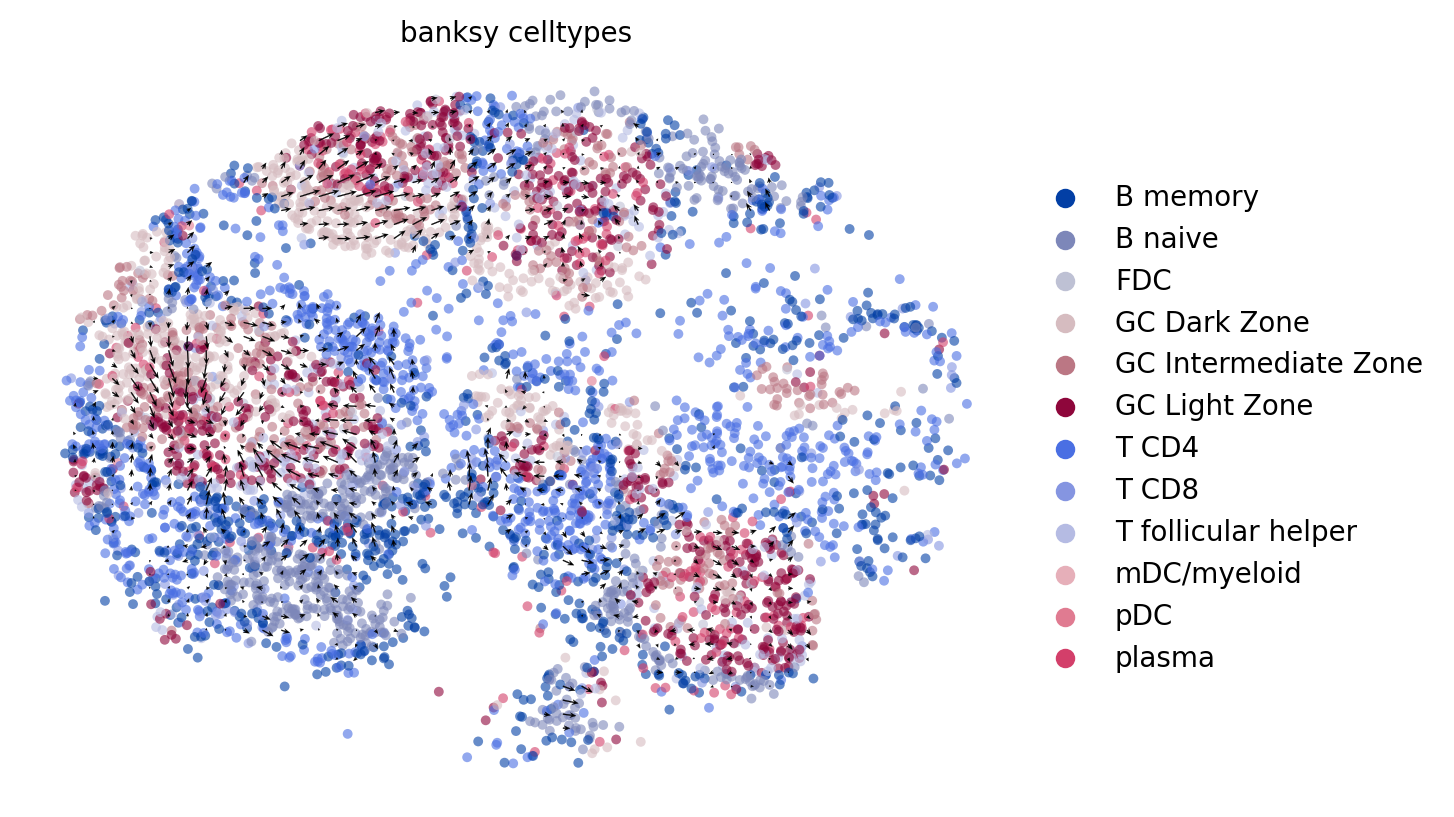

In [22]:
# %%capture
X_grid, V_grid = chart.get_grids(P, projection_params)
vector_field_df = chart.vector_field_df(X_grid, V_grid)

In [39]:
import alphashape

In [42]:
source_cells = adata.obs[adata.obs['cell_type'] == source_ct].index
adata.obs['transition'] = adata.obs['cell_type'].copy()
adata.obs.loc[source_cells, 'transition'] = np.array(transitions)
ct_points_wt, ct_points_ko = chart.make_celltype_dict()

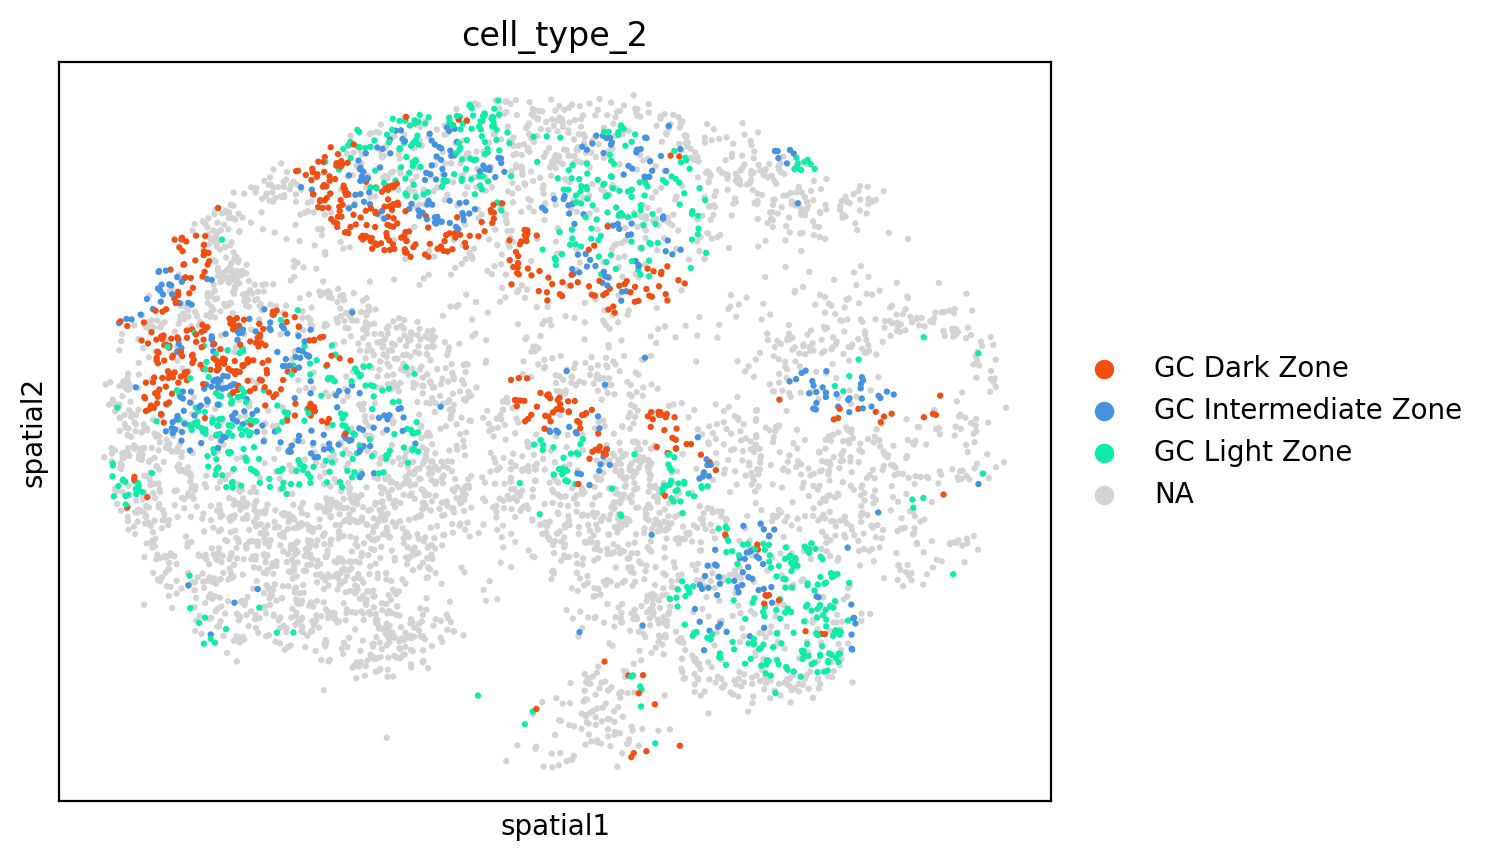

In [101]:
sc.pl.embedding(adata, color=['cell_type_2'], 
    basis='spatial', palette=color_dict, groups=['GC Light Zone', 'GC Dark Zone', 'GC Intermediate Zone'])

In [43]:
delta_df = perturbed_df - adata.to_df(layer='imputed_count')

In [44]:
import alphashape
alpha_shape_1 = alphashape.alphashape(ct_points_wt['GC Light Zone'], alpha=0.04)
alpha_shape_2 = alphashape.alphashape(ct_points_wt['GC Dark Zone'], alpha=0.04)
alpha_shape_3 = alphashape.alphashape(ct_points_wt['GC Intermediate Zone'], alpha=0.04)

In [45]:
xy = xy_from_adata(adata)

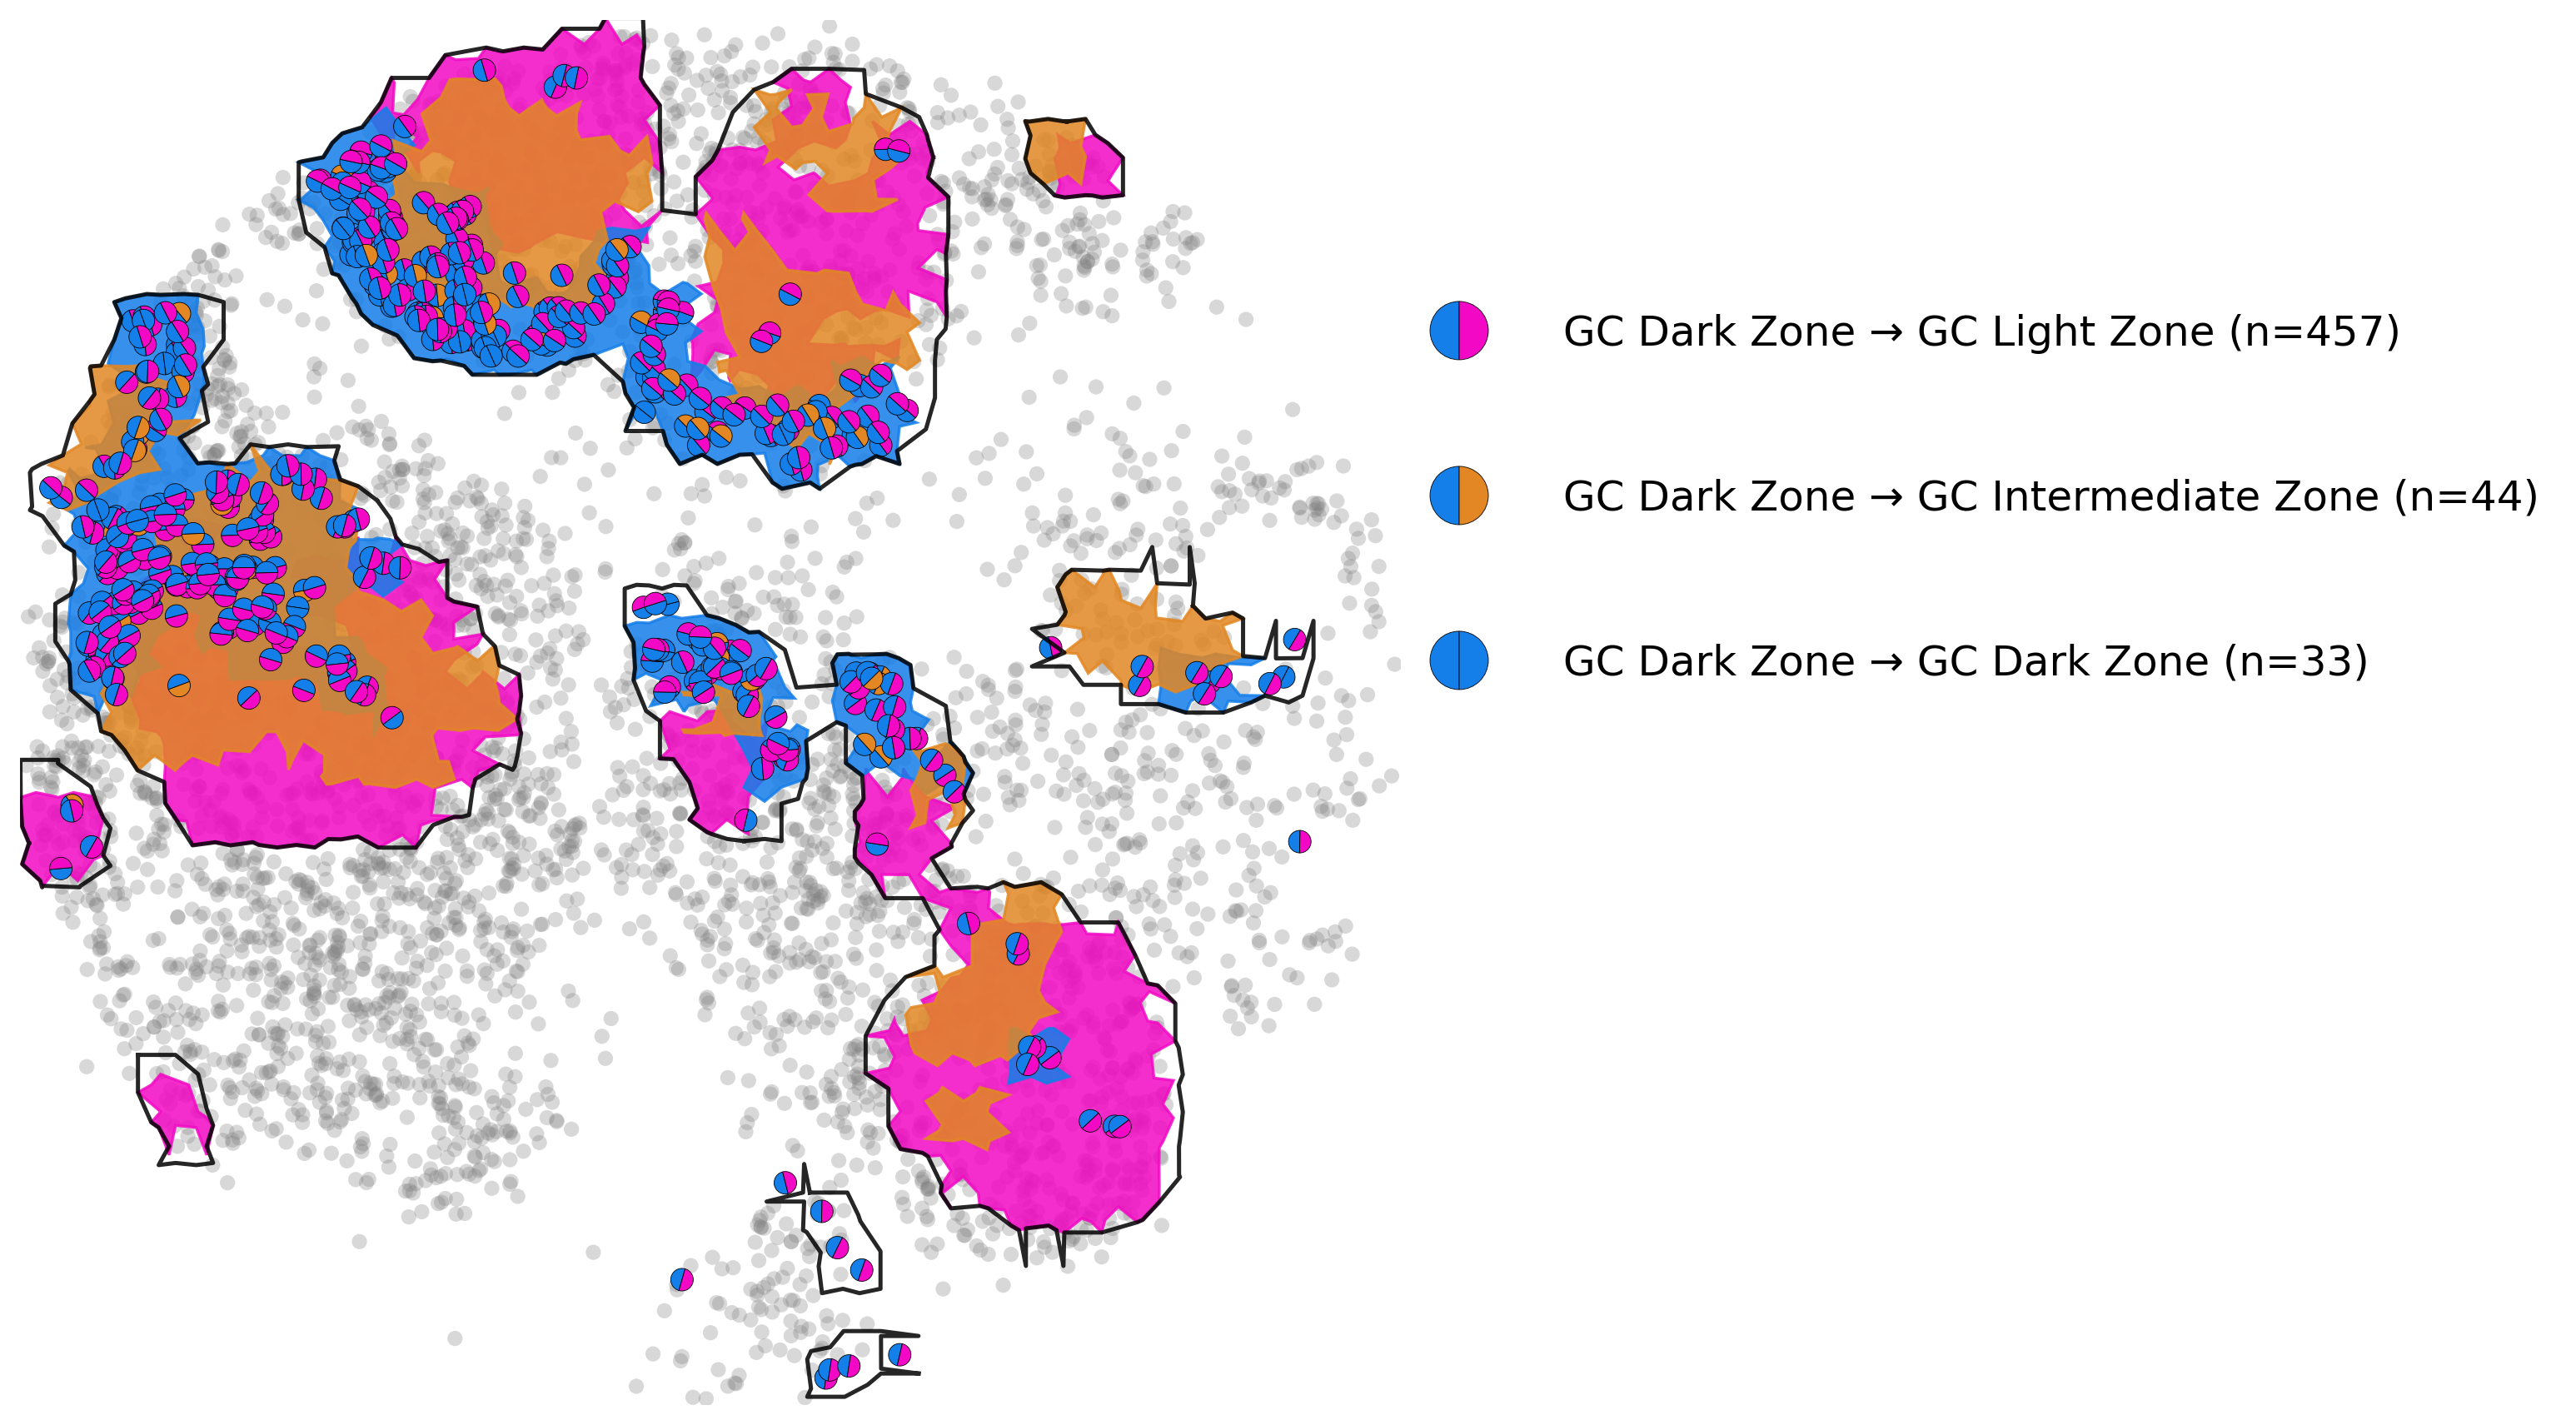

In [46]:
from matplotlib.legend_handler import HandlerTuple
import matplotlib
# Custom handler for wedge pairs in legend
class WedgePairHandler:
    def __init__(self, rotation=0):
        self.rotation = rotation
        
    def legend_artist(self, legend, orig_handle, fontsize, handlebox):
        x0, y0 = handlebox.xdescent, handlebox.ydescent
        width, height = handlebox.width, handlebox.height
        r = min(width, height) * 1
        center = (x0 + width/2, y0 + height/2)
        
        # Create left and right wedges with rotation
        wedge1 = matplotlib.patches.Wedge(
            center=center,
            r=r,
            theta1=90 + self.rotation, theta2=270 + self.rotation,
            facecolor=orig_handle[0].get_facecolor(),
            edgecolor='black',
            linewidth=0.25,
            transform=handlebox.get_transform()
        )
        
        wedge2 = matplotlib.patches.Wedge(
            center=center,
            r=r,
            theta1=-90 + self.rotation, theta2=90 + self.rotation,
            facecolor=orig_handle[1].get_facecolor(),
            edgecolor='black', 
            linewidth=0.25,
            transform=handlebox.get_transform()
        )
        
        handlebox.add_artist(wedge1)
        handlebox.add_artist(wedge2)
        return [wedge1, wedge2]

fig, ax = plt.subplots(figsize=(20, 9), dpi=120)
data = xy.join(adata.obs)
source_data = data[data.banksy_celltypes == source_ct]
transition_data = data.loc[source_cells]

scatter = sns.scatterplot(
    data=xy.join(adata.obs),
    x='x', y='y',
    # hue='banksy_celltypes', 
    color='grey',
    s=30,
    alpha=0.3,
    edgecolor='none',
    # palette=color_dict,
    ax=ax,
)



zone_alpha = 0.85
for geom in alpha_shape_1.geoms:
    if geom.area > 5000:
        ax.fill(
            geom.exterior.xy[0], 
            geom.exterior.xy[1], 
            color=color_dict['GC Light Zone'], alpha=zone_alpha)
        

for geom in alpha_shape_2.geoms:
    if geom.area > 5000:
        ax.fill(
            geom.exterior.xy[0], 
            geom.exterior.xy[1], 
            color=color_dict['GC Dark Zone'], alpha=zone_alpha)

for geom in alpha_shape_3.geoms:
    if geom.area > 5000:
        ax.fill(
            geom.exterior.xy[0], 
            geom.exterior.xy[1], 
            color=color_dict['GC Intermediate Zone'], alpha=zone_alpha)

alpha_shape_4 = alphashape.alphashape(
    np.concatenate(
        [ct_points_wt['GC Light Zone'], 
         ct_points_wt['GC Intermediate Zone'], 
         ct_points_wt['GC Dark Zone']]
        ), alpha=0.03)

for geom in alpha_shape_4.geoms:
    if geom.area > 10000:
        ax.plot(
            geom.exterior.xy[0], 
            geom.exterior.xy[1], 
            color='black', alpha=zone_alpha)

# Create scatter plot with legend



    
radius = 18

angles = vector_field_df.angle

for idx, row in data.iterrows():
    if idx in source_cells:
        angle = angles[idx]
        circle1 = matplotlib.patches.Wedge((row.x, row.y), radius, 90+angle, 270+angle,
                                         facecolor=color_dict[row.banksy_celltypes],
                                         alpha=1,
                                         edgecolor='black', linewidth=0.25)
        circle2 = matplotlib.patches.Wedge((row.x, row.y), radius, -90+angle, 90+angle,
                                         facecolor=color_dict[row.transition],
                                         alpha=1,
                                         edgecolor='black', linewidth=0.25)
        ax.add_patch(circle1)
        ax.add_patch(circle2)
    else:
        continue
        circle = plt.Circle((row.x, row.y), radius=radius//1.5,
                          facecolor='grey',
                          alpha=0.5,
                          edgecolor='none') 
        ax.add_patch(circle)
# for ii, jj in edges:
#     ax.plot(
#         points[[ii, jj], 0], 
#         points[[ii, jj], 1], 'k', 
#         linewidth=1, alpha=0.65, 
#         linestyle='--', color='red')

ax.set_frame_on(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_aspect('equal')
ax.set_xlim(data.x.min() - 10, data.x.max() + 10)
ax.set_ylim(data.y.min() - 10, data.y.max() + 10)

# Collect all unique transition types from transition_data
unique_transitions = transition_data['transition'].unique()

# Create legend elements for each transition type
legend_elements = []
labels = []

# Create legend elements with fixed angles for consistent appearance
for transition in unique_transitions:
    # Count number of transitions for this type
    n_transitions = len(transition_data[transition_data['transition'] == transition])
    
    wedge_source = matplotlib.patches.Wedge((0,0), radius, 0, 0,
                                          facecolor=color_dict[source_ct])
    wedge_transition = matplotlib.patches.Wedge((0,0), radius, 0, 0,
                                              facecolor=color_dict[transition])
    legend_elements.append((wedge_source, wedge_transition))
    labels.append(f"{source_ct} → {transition} (n={n_transitions})")

# Create the transitions legend using custom handler with 45 degree rotation
transition_legend = ax.legend(legend_elements, labels, 
                            handler_map={tuple: WedgePairHandler(rotation=0)},
                            bbox_to_anchor=(1, 0.8), 
                            # loc='center right', 
                            borderaxespad=0.,
                            fontsize=15,
                            markerscale=5,
                            labelspacing=3,
                            handletextpad=1.5, 
                            frameon=False,
                            title="")


# sns.scatterplot(
#     data=vector_field_df.join(adata.obs).query(
#         'cell_type == "B_germinal_center"'), 
#     x='x', y='y', s=50, 
#     hue='banksy_celltypes', palette=color_dict, legend=False, ax=ax)

vecdf = vector_field_df.join(adata.obs).query(
    'banksy_celltypes == "plasma"')

magn = np.sqrt(V_grid[:, 0]**2 + V_grid[:, 1]**2)

# ax.quiver(vecdf['x'], vecdf['y'], 
#           np.cos(np.radians(vecdf['angle'])), 
#           np.sin(np.radians(vecdf['angle'])),
#           scale=25, width=0.002, alpha=0.5)

# q = plt.quiver(X_grid[:, 0], X_grid[:, 1], V_grid[:, 0], V_grid[:, 1],
#             #    magnitudes, 
#                cmap='magma', 
#                linewidth=0.4,
#                scale=1000, width=0.0035, 
#                alpha=0.4, edgecolor=None)

plt.xlabel('')
plt.ylabel('')
plt.title('')

# plt.tight_layout()
# plt.savefig('/tmp/transition_figure.png', dpi=300, format='png')
plt.show()

# scatter_legend = ax.legend(
#     title="Cell Types", bbox_to_anchor=(1.5, -0.0), 
#     loc='lower right', markerscale=2)

# for lh in scatter_legend.legend_handles:
#     lh.set_alpha(1)
# ax.add_artist(scatter_legend)

In [212]:
# fig, ax = plt.subplots(figsize=(10, 10), dpi=120)
# data = xy.join(adata.obs)
# source_data = data[data.banksy_celltypes == source_ct]
# transition_data = data.loc[source_cells]

# scatter = sns.scatterplot(
#     data=xy.join(adata.obs),
#     x='x', y='y',
#     # hue='banksy_celltypes', 
#     color='grey',
#     s=30,
#     alpha=0.3,
#     edgecolor='none',
#     # palette=color_dict,
#     ax=ax,
# )

# alpha_shape_1 = alphashape.alphashape(ct_points_ko['GC Light Zone'], alpha=0.04)
# alpha_shape_2 = alphashape.alphashape(ct_points_ko['GC Dark Zone'], alpha=0.04)
# alpha_shape_3 = alphashape.alphashape(ct_points_ko['GC Intermediate Zone'], alpha=0.04)

# zone_alpha = 0.85
# for geom in alpha_shape_1.geoms:
#     if geom.area > 5000:
#         ax.fill(
#             geom.exterior.xy[0], 
#             geom.exterior.xy[1], 
#             color=color_dict['GC Light Zone'], alpha=zone_alpha)
        

# for geom in alpha_shape_2.geoms:
#     if geom.area > 5000:
#         ax.fill(
#             geom.exterior.xy[0], 
#             geom.exterior.xy[1], 
#             color=color_dict['GC Dark Zone'], alpha=zone_alpha)

# for geom in alpha_shape_3.geoms:
#     if geom.area > 5000:
#         ax.fill(
#             geom.exterior.xy[0], 
#             geom.exterior.xy[1], 
#             color=color_dict['GC Intermediate Zone'], alpha=zone_alpha)

# alpha_shape_4 = alphashape.alphashape(
#     np.concatenate(
#         [ct_points_wt['GC Light Zone'], 
#          ct_points_wt['GC Intermediate Zone'], 
#          ct_points_wt['GC Dark Zone']]
#         ), alpha=0.03)

# for geom in alpha_shape_4.geoms:
#     if geom.area > 10000:
#         ax.plot(
#             geom.exterior.xy[0], 
#             geom.exterior.xy[1], 
#             color='black', alpha=zone_alpha)

# ax.set_frame_on(False)
# ax.set_xticks([])
# ax.set_yticks([])
# ax.set_xlabel('')
# ax.set_ylabel('')
# ax.set_aspect('equal')
# ax.set_xlim(data.x.min() - 10, data.x.max() + 10)
# ax.set_ylim(data.y.min() - 10, data.y.max() + 10)
# plt.show()